Разведочный анализ данных (EDA exploratory data analysis) 

Введение

Затраты на здравоохранение играют важную роль в обеспечении доступности качественной медицинской помощи. В свою очередь на медицинские расходы могут оказывать влияние различные факторы. 
Во-первых, увеличение доли пожилого населения приводит к росту спроса на медицинские услуги, включая лечение хронических заболеваний. Во-вторых, технологические инновации в области медицины, которые, с одной стороны, приводят к расширению возможностей лечения и диагностики, но, с другой, могут увеличивать стоимость медицинской помощи. Образ жизни, например, вредные привычки, демографические и региональные особенности, все это так же вносит свой вклад. 

Цель исследования: выявить характеристики, оказывающие наибольшее влияние на уровень медицинских расходов.


Данные для анализа взяты с сайта Kaggle из заранее скачaнного файла "insurance.csv".
Используемые инструменты: Python3, Pandas, NumPy, Matplotlib, Seaborn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [18]:
df = pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
Данные содержат 7 столбцов и 1338 строк

In [8]:
df.shape

(1338, 7)

In [ ]:
Так как данные могут содержать пропуски и дубликаты значений, необходима предварительная проверка.

In [12]:
df.isna().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
В данных пропусков нет.

In [20]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
Расценим как адекватный дубликат.

In [ ]:
Категориальные и числовые данные:

In [ ]:
categ_cols = ["sex", "smoker", "region"]
var_cols = ["age", "bmi", "children", "charges"]

In [ ]:
Рассмотрим подробнее числовые столбцы
Растут ли расходы с увеличением возраста, ИМТ, количества детей?

In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


В 75% случаев возраст не превышал 51 год, ИМТ соответствовал первой степени ожирения (34,7), количество детей не более 2.

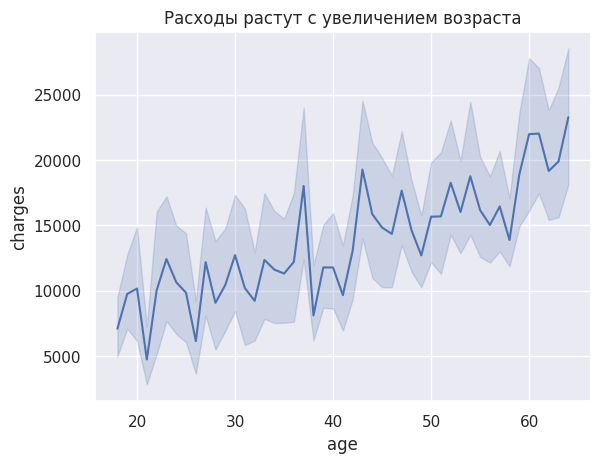

In [51]:
sns.lineplot(data=df, x='age', y='charges')
plt.title('Расходы растут с увеличением возраста')
plt.show()

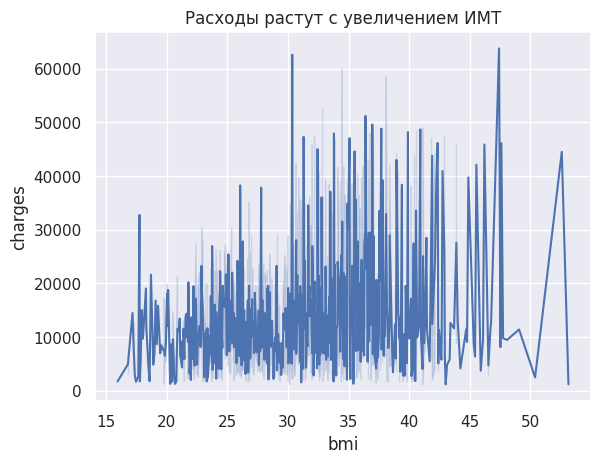

In [50]:
sns.lineplot(data=df, x='bmi', y='charges')
plt.title('Расходы растут с увеличением ИМТ')
plt.show()

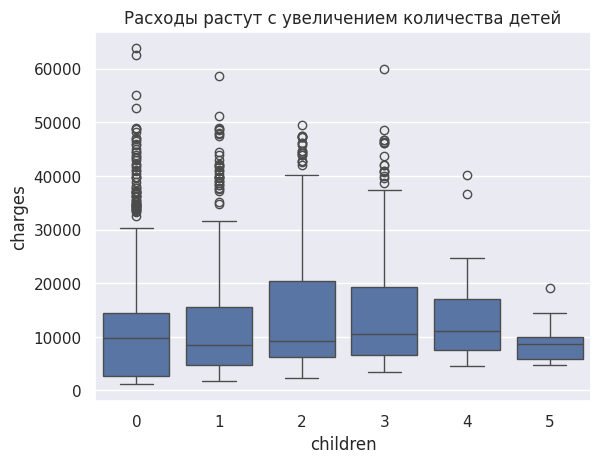

In [33]:
sns.boxplot(data=df, x='children', y='charges')
plt.title('Расходы растут с увеличением количества детей')
plt.show()

In [ ]:
Зависит ли расход от пола или вредных привычек (курение)?

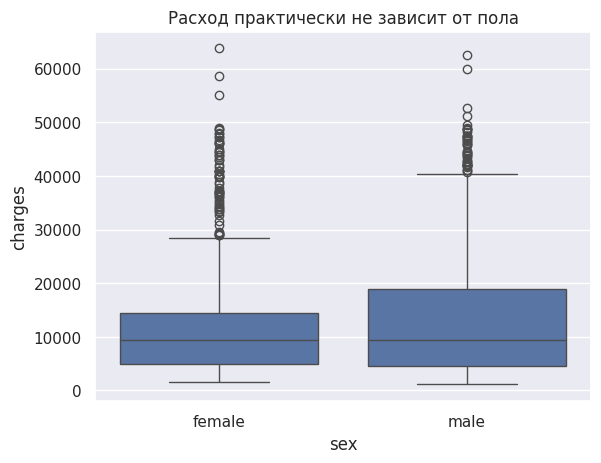

In [45]:
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Расход практически не зависит от пола')
plt.show()

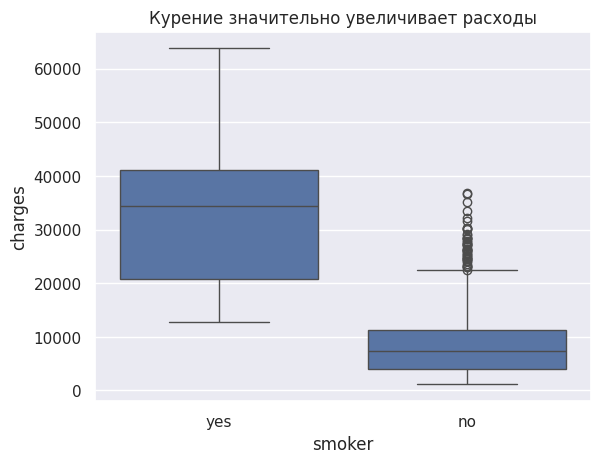

In [47]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Курение значительно увеличивает расходы')
plt.show()

По результатам данного исследования, уровень медицинских расходов растет с возрастом, увеличением ИМТ и количества детей. Однако наибольший вклад оказывает курение. 